## TYK2 DMS IL-23 Assay

### Summary Statistics
  -  DL4-1: [Normalized](../sumstats/TYK2/run10/tyk2-run10-DL4_1-normalized.tsv), [Unnormalized](../sumstats/TYK2/run10/tyk2-run10-DL4_1-unnormalized.tsv)
  -  DL4-2: [Normalized](../sumstats/TYK2/run10/tyk2-run10-DL4_2-normalized.tsv), [Unnormalized](../sumstats/TYK2/run10/tyk2-run10-DL4_1-unnormalized.tsv)
  -  DL7: [Normalized](../sumstats/TYK2/run10/tyk2-run10-DL7-normalized.tsv), [Unnormalized](../sumstats/TYK2/run10/tyk2-run10-DL7-unnormalized.tsv)

### Heatmaps

In [84]:
library(ggpubr)
library(patchwork)
library(tidyverse)

source("../src/dms-analysis-utils.R")

sumstats_norm <- read_tsv("../sumstats/TYK2/run10/tyk2-run10-DL4_1-normalized.tsv")
sumstats_raw <- read_tsv("../sumstats/TYK2/run10/tyk2-run10-DL4_1-unnormalized.tsv")

Rows: 1400 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): aa, contrast
dbl (7): chunk, pos, log2ContrastEstimate, log2ContrastError, statistic, p.v...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2800 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): aa, contrast
dbl (6): chunk, pos, log2FoldChange, log2StdError, statistic, p.value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [96]:
heat_raw_l2fc <- sumstats_raw %>%
    mutate(aa = if_else(aa == "*", "Stop", aa)) %>%
    ggplot() +
        geom_tile(aes(x = pos, y = fct_rev(aa), fill =log2FoldChange)) +
        scale_fill_scico_mid( limits = c(-1,1), palette = "vik", mid = 0, oob = squish) +
        theme_pubr(base_size = 16, x.text.angle = 45) +
        theme(legend.text=element_text(size=14),
              legend.key.size = unit(1,"cm"),
              axis.text.y = element_text(size = 14)) +
        facet_wrap(~contrast, ncol = 1)  +
        xlab("TYK2 Position") + ylab("")

heat_raw_z <- sumstats_raw %>%
    mutate(aa = if_else(aa == "*", "Stop", aa)) %>%
    ggplot() +
        geom_tile(aes(x = pos, y = fct_rev(aa), fill = statistic)) +
        scale_fill_scico_mid( limits = c(-8,5), palette = "vik", mid = 0, oob = squish) +
        theme_pubr(base_size = 16, x.text.angle = 45) +
        theme(legend.text=element_text(size=14),
              legend.key.size = unit(1,"cm"),
              axis.text.y = element_text(size = 14)) +
        facet_wrap(~contrast, ncol = 1)  +
        xlab("TYK2 Position") + ylab("")

heat_norm_l2fc <- sumstats_norm %>%
    mutate(aa = if_else(aa == "*", "Stop", aa)) %>%
    ggplot() +
        geom_tile(aes(x = pos, y = fct_rev(aa), fill = log2ContrastEstimate)) +
        scale_fill_scico_mid( limits = c(-1,1), palette = "vik", mid = 0, oob = squish) +
        theme_pubr(base_size = 16, x.text.angle = 45) +
        theme(legend.text=element_text(size=14),
              legend.key.size = unit(1,"cm"),
              axis.text.y = element_text(size = 14)) +
        xlab("TYK2 Position") + ylab("") +
        ggtitle("IL-23 minus None")

heat_norm_z <- sumstats_norm %>%
    mutate(aa = if_else(aa == "*", "Stop", aa)) %>%
    ggplot() +
        geom_tile(aes(x = pos, y = fct_rev(aa), fill =statistic)) +
        scale_fill_scico_mid( limits = c(-8,5), palette = "vik", mid = 0, oob = squish) +
        theme_pubr(base_size = 16, x.text.angle = 45) +
        theme(legend.text=element_text(size=14),
              legend.key.size = unit(1,"cm"),
              axis.text.y = element_text(size = 14))  +
        xlab("TYK2 Position") + ylab("") +
        ggtitle("IL-23 minus None")

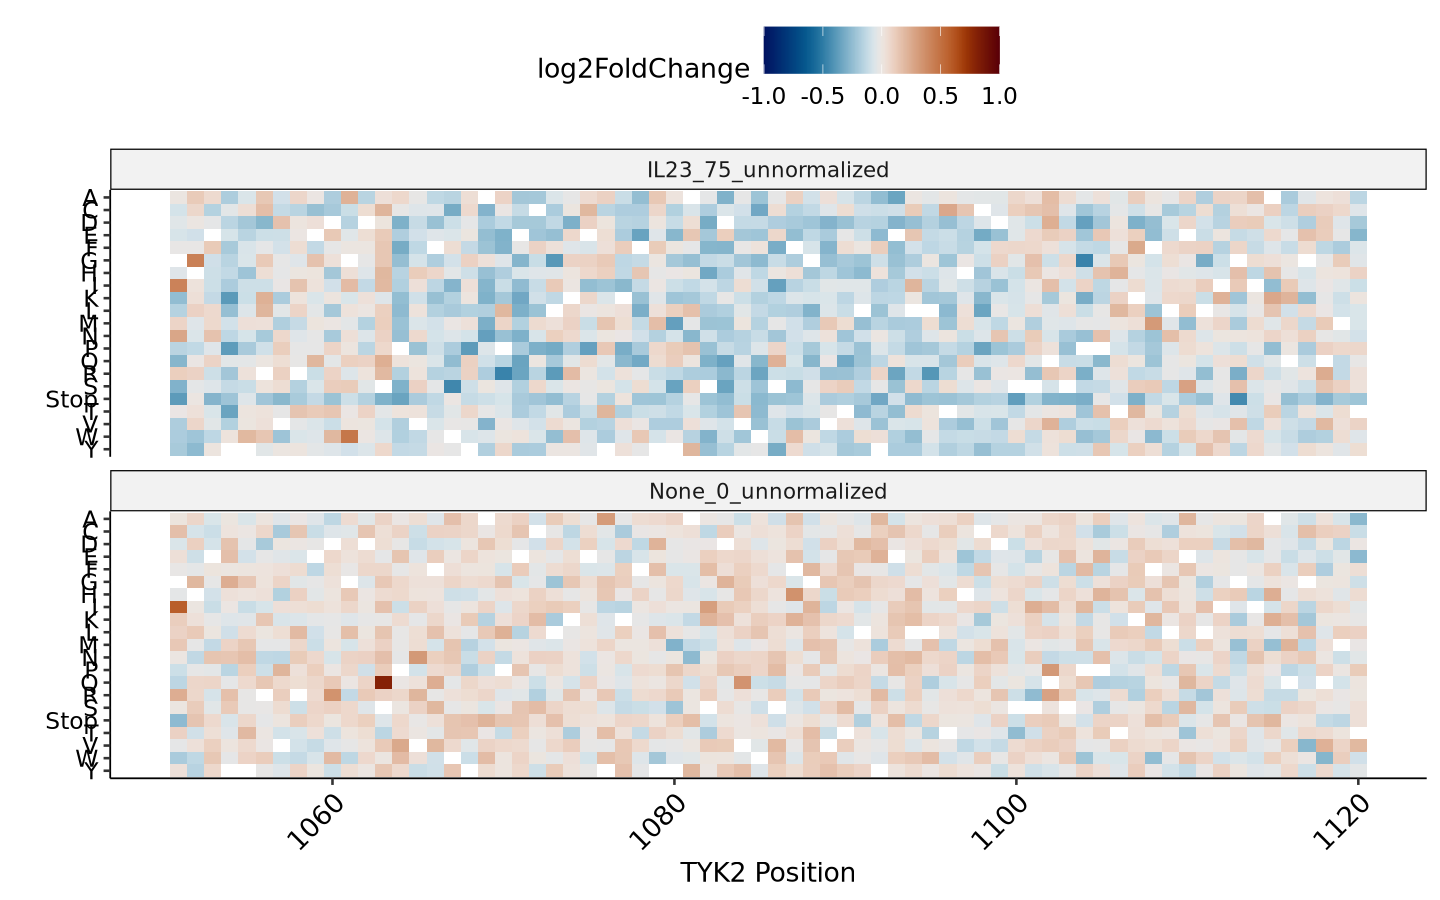

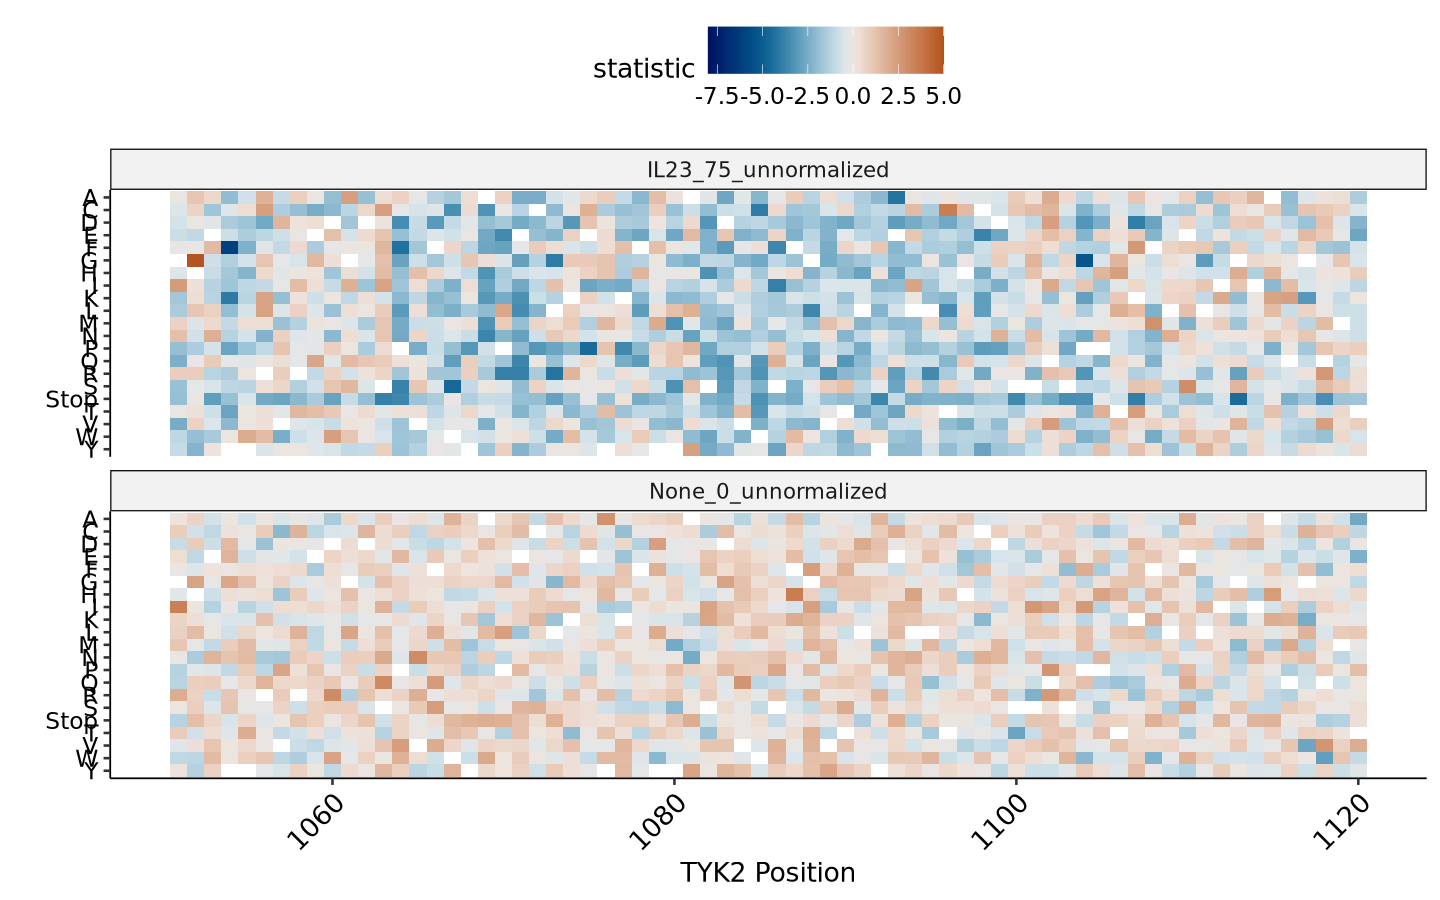

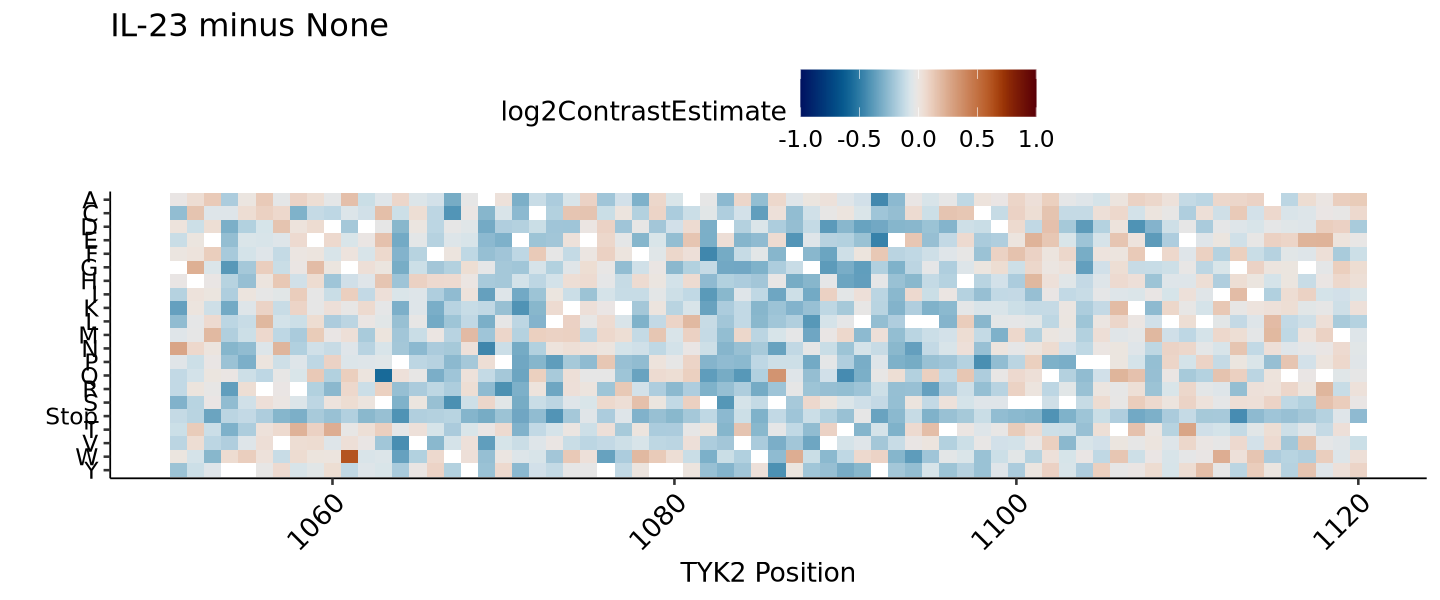

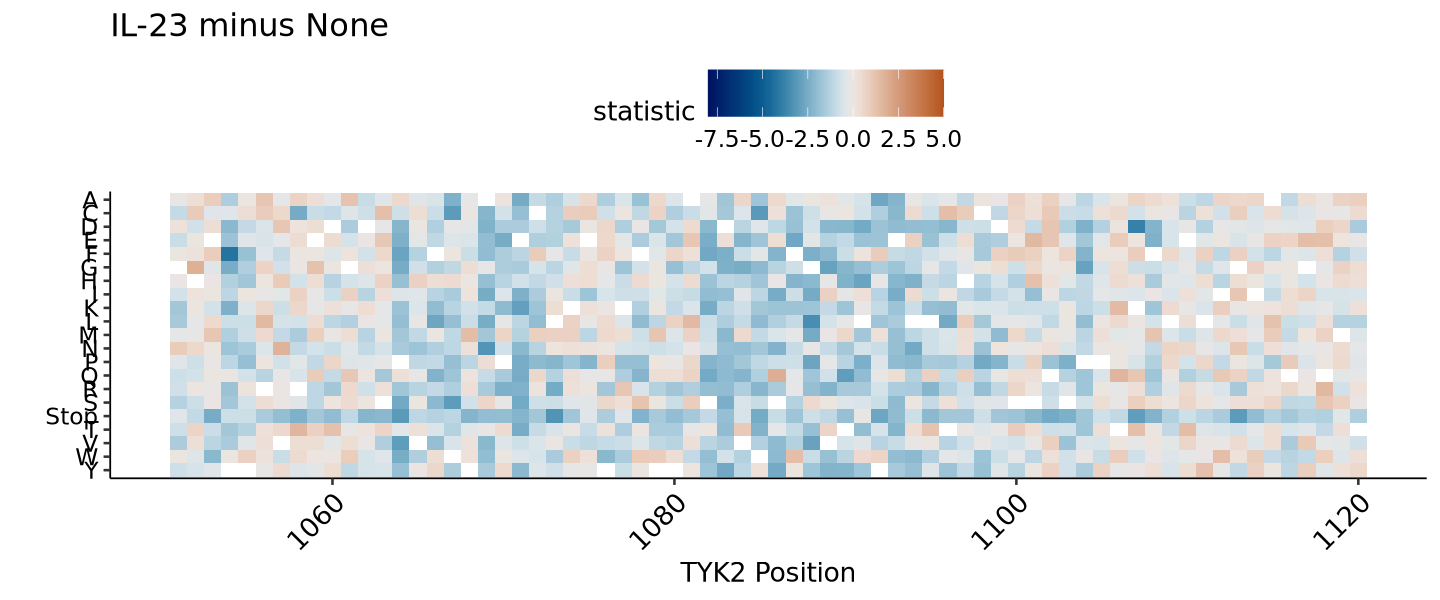

In [97]:
options(repr.plot.width = 12, repr.plot.height = 7.5)
heat_raw_l2fc
heat_raw_z

options(repr.plot.width = 12, repr.plot.height = 5)
heat_norm_l2fc 
heat_norm_z

In [101]:
pdf("../dataviz/TYK2/il23/TYK2-IL23-run10-heatmaps-unnormalized.pdf", width = 12, height = 7.5)
heat_raw_l2fc
heat_raw_z
dev.off()

pdf("../dataviz/TYK2/il23/TYK2-IL23-run10-heatmaps-normalized.pdf", width = 12, height = 5)
heat_norm_l2fc 
heat_norm_z
dev.off()

png 
  2

png 
  2

### Spike-ins

In [81]:
spikeins <- sumstats_raw %>%
    filter(str_c(pos, aa) %in% c("1104A", "1054F", "1055F")) %>%
    mutate(contrast = gsub("_unnormalized", "", contrast)) %>%
    ggplot() +
        geom_pointrange(aes(x = str_c(pos, aa),
                            y = log2FoldChange,
                            ymin = log2FoldChange - 2*log2StdError,
                            ymax = log2FoldChange + 2*log2StdError,
                            color = contrast,
                            group = contrast),
                        position = position_dodge(width = 0.4), size = 1, linewidth = 1) +
        theme_pubr(base_size = 16) +
        scale_color_manual(values = c("None_0" = "gray",
                                      "IL23_75" = "magenta")) +
        geom_hline(yintercept = 0, lty = "dashed") +
        theme(legend.title = element_blank()) +
        xlab("") + ylab("Log2 Fold Change\n+/- 2 Standard Errors")

spikein_stop <- sumstats_raw %>%
    filter(str_c(pos, aa) %in% c("1104*", "1054*", "1055*")) %>%
    mutate(contrast = gsub("_unnormalized", "", contrast)) %>%
    ggplot() +
        geom_pointrange(aes(x = str_c(pos, aa),
                            y = log2FoldChange,
                            ymin = log2FoldChange - 2*log2StdError,
                            ymax = log2FoldChange + 2*log2StdError,
                            color = contrast,
                            group = contrast),
                        position = position_dodge(width = 0.4), size = 1, linewidth = 1) +
        theme_pubr(base_size = 16) +
        scale_color_manual(values = c("None_0" = "gray",
                                      "IL23_75" = "magenta")) +
        geom_hline(yintercept = 0, lty = "dashed") +
        theme(legend.title = element_blank()) +
        xlab("") + ylab("Log2 Fold Change\n+/- 2 Standard Errors")

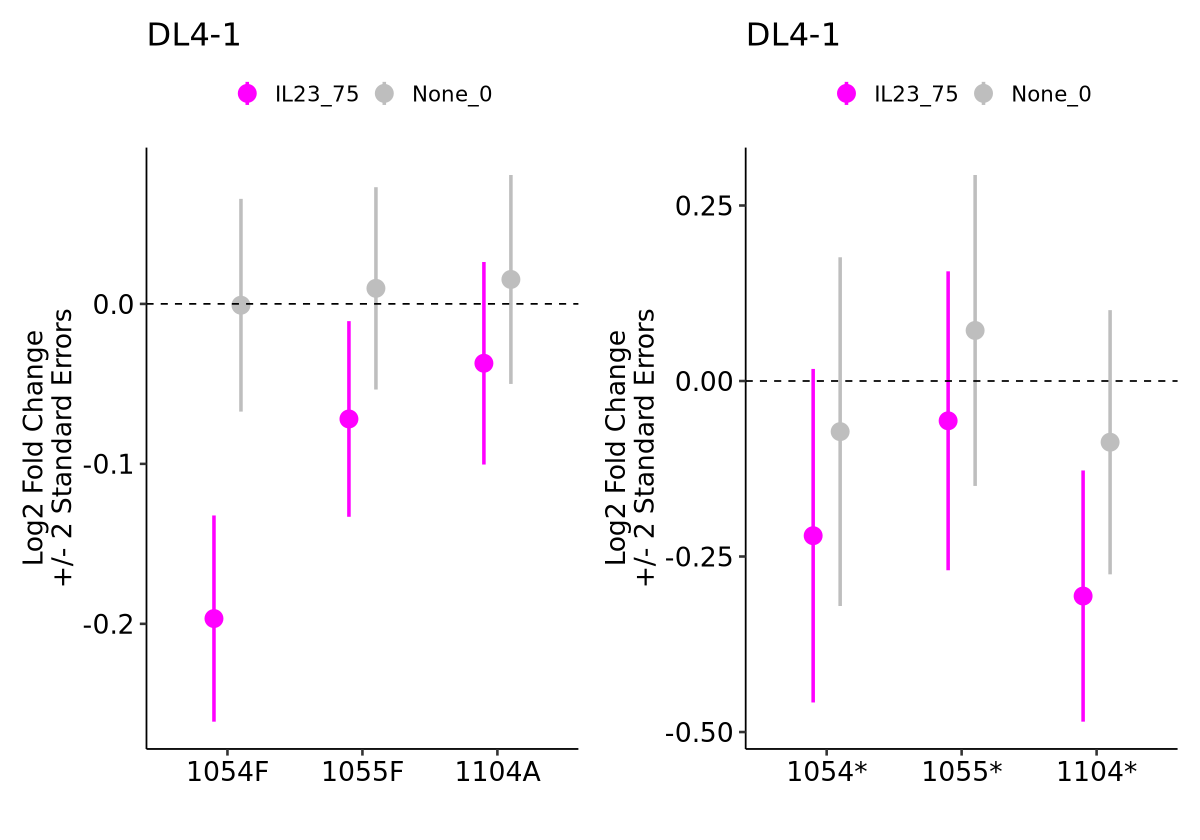

In [89]:
options(repr.plot.width = 10, repr.plot.height = 7)
spikeins + spikein_stop & ggtitle("DL4-1")

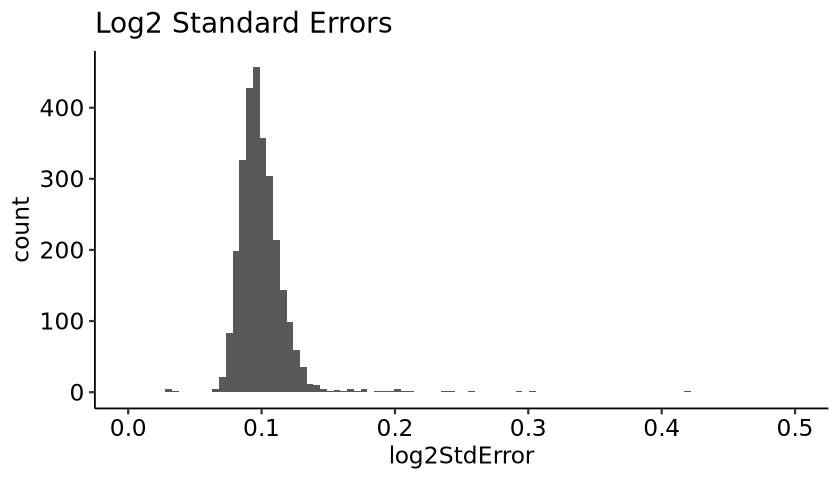

In [95]:
options(repr.plot.width = 7, repr.plot.height = 4, warn = -1)
sumstats_raw %>%
    ggplot() +
        geom_histogram(aes(x = log2StdError), bins = 100) +
        theme_pubr(base_size = 14) +
        xlim(c(0, 0.5)) +
        ggtitle("Log2 Standard Errors")

### IL-23 <-> IFN-alpha Comparison